In [1]:
import scipy
from scipy.linalg import hadamard
import math
import numpy as np
import matplotlib
from math import factorial
from matplotlib import pyplot as plt
from sympy.functions.combinatorial.numbers import stirling
from scipy.stats import norm
from scipy.misc import comb
import random
import itertools
from collections import namedtuple
%matplotlib inline

In [2]:
matplotlib.rc('font', family='DejaVu Sans')

figure_size = (16, 8)

## Task 1

In [3]:
def int_to_vector(value, size):
    return np.unpackbits(np.array([value], dtype=np.uint8))[-size:]

In [16]:
def dot_bin_vectors(a, b):
    '''Возвращает результат произведения двух бинарных векторов, представленных числами.'''
    mult_result = a & b
    # Считаем число единиц в mult_result.
    result = 0
    while mult_result:
        result += 1
        mult_result &= (mult_result - 1)
    return result

In [5]:
def get_max_characteristics(permutation):
    CharacteristicDescription = namedtuple('CharacteristicDescription', ['a', 'b', 'value'])
    
    result = dict(linear=CharacteristicDescription(0, 0, 0),\
                  difference=CharacteristicDescription(0, 0, 0))
    
    n = round(math.log(len(permutation), 2))

    for a, b in zip(range(1, 2**n), range(1, 2**n)):
        difference_characteristic = 0
        linear_approximation = -2**(n-1)

        for x in range(2**n):
            if permutation[x] ^ permutation[x^a] == b:
                difference_characteristic += 1
            if dot_bin_vectors(a, x) == dot_bin_vectors(b, permutation[x]):
                linear_approximation += 1
            """if np.dot(a_vector, int_to_vector(x, n)) ==\
               np.dot(b_vector, int_to_vector(permutation[x], n)):
                    linear_approximation += 1"""

        if difference_characteristic > result['difference'].value:
            result['difference'] = CharacteristicDescription(a, b, difference_characteristic)
        if linear_approximation > result['linear'].value:
            result['linear'] = CharacteristicDescription(a, b, linear_approximation)
        
    return result

In [6]:
def get_max_distribution(n):
    max_difference_characteristics = []
    max_linear_approximations = []
    
    for permutation in itertools.permutations(range(0, 2**n)):
        max_characteristics = get_max_characteristics(permutation)
        max_difference_characteristic = max_characteristics['difference'].value
        max_linear_approximation = max_characteristics['linear'].value
        
        max_difference_characteristics.append(max_difference_characteristic)
        max_linear_approximations.append(max_linear_approximation)
    
    return (max_difference_characteristics, max_linear_approximations)

In [17]:
print(get_max_distribution(3))

([8, 8, 8, 4, 4, 8, 8, 8, 4, 8, 8, 4, 4, 8, 8, 4, 8, 8, 8, 4, 4, 8, 8, 8, 8, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 8, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 8, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 8, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 8, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 8, 8, 4, 4, 2, 2, 2, 2, 8, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 8, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 8, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 8, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 8, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 8, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 8, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2,

## Task 2

In [8]:
from sympy.combinatorics.permutations import Permutation

In [9]:
def get_function_to_Zhegalkin_coeffs_matrix_G(n):
    if n in get_function_to_Zhegalkin_coeffs_matrix_G.cache:
        return get_function_to_Zhegalkin_coeffs_matrix_G.cache[n]
    
    G_n_prev = get_function_to_Zhegalkin_coeffs_matrix_G(n - 1)
    result = np.asmatrix(np.vstack([np.hstack([G_n_prev, np.zeros(G_n_prev.shape, dtype=int)]),\
                                    np.hstack([G_n_prev, G_n_prev])]))
    
    get_function_to_Zhegalkin_coeffs_matrix_G.cache[n] = result
    return result

get_function_to_Zhegalkin_coeffs_matrix_G.cache = {0: np.matrix([1], dtype=int)}

In [18]:
def conjunction_to_str(conjunction):
    """Конвертирует конъюнкцию, представляемую вектором входящих переменных, в строковую запись.
    [1, 3, 4] -> x1x3x4
    с нижними индексами в Libre Office."""
    
    return ''.join(map(lambda var: "x_{{{}}}".format(var), conjunction))  # Господи, питон, серьёзно?

In [52]:
def str_Zhegalkin_polynomial(Zhegalkin_coeffs):
    n = round(math.log(len(Zhegalkin_coeffs), 2))
    included_conjunctions = []
    
    for i in range(1, len(Zhegalkin_coeffs)):
        if Zhegalkin_coeffs[i]:
            variable_vector = []
            included_variables = bin(i)[2:].zfill(n)
            for j in range(len(included_variables)):
                if included_variables[j] != '0':
                    variable_vector.append(j + 1)
            included_conjunctions.append(variable_vector)
    
    included_conjunctions.sort(key=lambda conj: (len(conj), conj))
    conjunctions_strings = [conjunction_to_str(conj) for conj in included_conjunctions]
    if Zhegalkin_coeffs[0]:
        conjunctions_strings = ['1'] + conjunctions_strings
    return ' ⊕ '.join(conjunctions_strings)

In [22]:
def get_positional_functions(permutation):
    n = round(math.log(len(permutation), 2))
    result = []
    for i in range(n):
        shift = n - i - 1
        another_function = [ (permutation[j] >> shift) & 1 for j in range(len(permutation)) ]
        result.append(np.matrix(another_function).T)
    return result

In [12]:
def str_permutation(permutation):
    permutation = Permutation(permutation)
    cycle_structure = permutation.full_cyclic_form
    return str(cycle_structure).replace(',', '').replace('[', '(').replace(']', ')').replace(') (', ')(')[1: -1]

In [67]:
def get_str_Zhegalkin_polynomials_from_permutation(permutation):
    n = round(math.log(len(permutation), 2))
    
    positional_functions = get_positional_functions(permutation)
    #print(positional_functions)
    positional_functions_Zhegalkin_polynomials =\
        [(get_function_to_Zhegalkin_coeffs_matrix_G(n) * positional_function) % 2 for\
         positional_function in positional_functions]
    #print(positional_functions_Zhegalkin_polynomials)
        
    positional_functions_Zhegalkin_polynomials = map(lambda matrix: matrix.A1,\
                                                     positional_functions_Zhegalkin_polynomials)
    positional_functions_Zhegalkin_polynomials = list(positional_functions_Zhegalkin_polynomials)
    
    Zhegalkin_polynomials_strings = map(str_Zhegalkin_polynomial, positional_functions_Zhegalkin_polynomials)
    Zhegalkin_polynomials_strings = list(Zhegalkin_polynomials_strings)
    #print(Zhegalkin_polynomials_strings)
    
    for i in range(len(Zhegalkin_polynomials_strings)):
        Zhegalkin_polynomials_strings[i] = 'y_{{{}}} = '.format(i + 1) + Zhegalkin_polynomials_strings[i]
    return '\n'.join(Zhegalkin_polynomials_strings)

In [68]:
def research_permutation(permutation):
    print('Цикловая структура подстановки:')
    print(str_permutation(permutation))
    
    print('Многочлены Жегалкина для разрядных функций:')
    print(get_str_Zhegalkin_polynomials_from_permutation(permutation))
    
    max_characteristics = get_max_characteristics(permutation)
    print('Лучшее линейное приближение дают a = {0.a}, b = {0.b}, значение = {0.value}'\
          .format(max_characteristics['linear']))
    print('Лучшую разностную характеристику дают a = {0.a}, b = {0.b}, значение = {0.value}'\
          .format(max_characteristics['difference']))

In [70]:
for i in range(10):
    print('Перестановка №{}:'.format(i + 1))
    research_permutation(np.random.permutation(range(2**7)))
    print()

Перестановка №1:
Цикловая структура подстановки:
(0 124 70 117 92 80 2 49 63 68 50 105 119 23 78 24 8 109 75 51 17 30 31 102 33 74 115 120 85 108 110 44 118 93 6 89 125)(1 123 126)(3 18 53 127 21 37 26 66 98 57 7 64 38 90 28 60 122 27)(4 19 55 59 29 69 35 25 48 42 46)(5 95 99 101 34 14 71 84 43 40 81 65 97 79 61 52 88 111 39 113 104 76 112 87 58 121 41 77 45 15 94 116 100 36 72 86 47 20 73 96 16 10 13 9 56 54 62 82 103 106 83 107 12 114)(11 91 32)(22 67)
Многочлены Жегалкина для разрядных функций:
y_{1} = 1 ⊕ x_{1} ⊕ x_{2} ⊕ x_{3} ⊕ x_{5} ⊕ x_{6} ⊕ x_{1}x_{2} ⊕ x_{1}x_{3} ⊕ x_{1}x_{4} ⊕ x_{1}x_{5} ⊕ x_{1}x_{7} ⊕ x_{2}x_{3} ⊕ x_{2}x_{4} ⊕ x_{2}x_{6} ⊕ x_{2}x_{7} ⊕ x_{3}x_{6} ⊕ x_{4}x_{5} ⊕ x_{4}x_{7} ⊕ x_{5}x_{7} ⊕ x_{1}x_{2}x_{4} ⊕ x_{1}x_{2}x_{7} ⊕ x_{1}x_{3}x_{6} ⊕ x_{1}x_{4}x_{5} ⊕ x_{1}x_{4}x_{6} ⊕ x_{2}x_{3}x_{4} ⊕ x_{2}x_{3}x_{7} ⊕ x_{2}x_{4}x_{6} ⊕ x_{2}x_{5}x_{7} ⊕ x_{2}x_{6}x_{7} ⊕ x_{3}x_{4}x_{6} ⊕ x_{3}x_{4}x_{7} ⊕ x_{4}x_{5}x_{6} ⊕ x_{4}x_{5}x_{7} ⊕ x_{5}x_{6}x_{7} ⊕ x_{1}x

## Task 3

In [72]:
def get_random_mapping(n):
    return [random.randint(0, n - 1) for _ in range(n)]

In [77]:
def get_strongly_connected_components(mapping):
    visited = [False] * len(mapping)
    result = []
    
    for i in range(len(mapping)):
        if visited[i]:
            continue
            
        current = i
        while not visited[current]:
            visited[current] = True
            current = mapping[current]
        
        new_component = []
        while current not in new_component:
            new_component.append(current)
            current = mapping[current]
        result.append(new_component)
    return result

In [82]:
def find_heights(mapping):
    points_on_cycles = set()
    components = get_strongly_connected_components(mapping)
    
    for cycle in components:
        for point in cycle:
            points_on_cycles.add(point)
            
    result = [0] * len(mapping)
    for point in range(len(mapping)):
        height = 0
        current = point
        while current not in points_on_cycles:
            height += 1
            current = mapping[current]
        result[point] = height
    
    return result

In [85]:
def find_points_without_prototype(mapping):
    result = []
    for point in range(len(mapping)):
        if point not in mapping:
            result.append(point)
    return result

In [93]:
def research_mapping(mapping):
    print('Число компонент сильной связности:', len(get_strongly_connected_components(mapping)))
    print('Число точек без прообраза:', len(find_points_without_prototype(mapping)))
    
    heights = find_heights(mapping)
    x = list(set(heights))
    x.sort()
    y = [heights.count(value) for value in x]
    
    plt.figure(figsize=figure_size)
    plt.title('Число точек на различных высотах для случайного отображения')
    plt.xlabel('Высота')
    plt.ylabel('Число точек')
    plt.margins(x=0.1)
    plt.stem(x, y, linefmt='b-', markerfmt='b.')
    plt.show()

Отображение №1:
Число компонент сильной связности: 68
Число точек без прообраза: 44


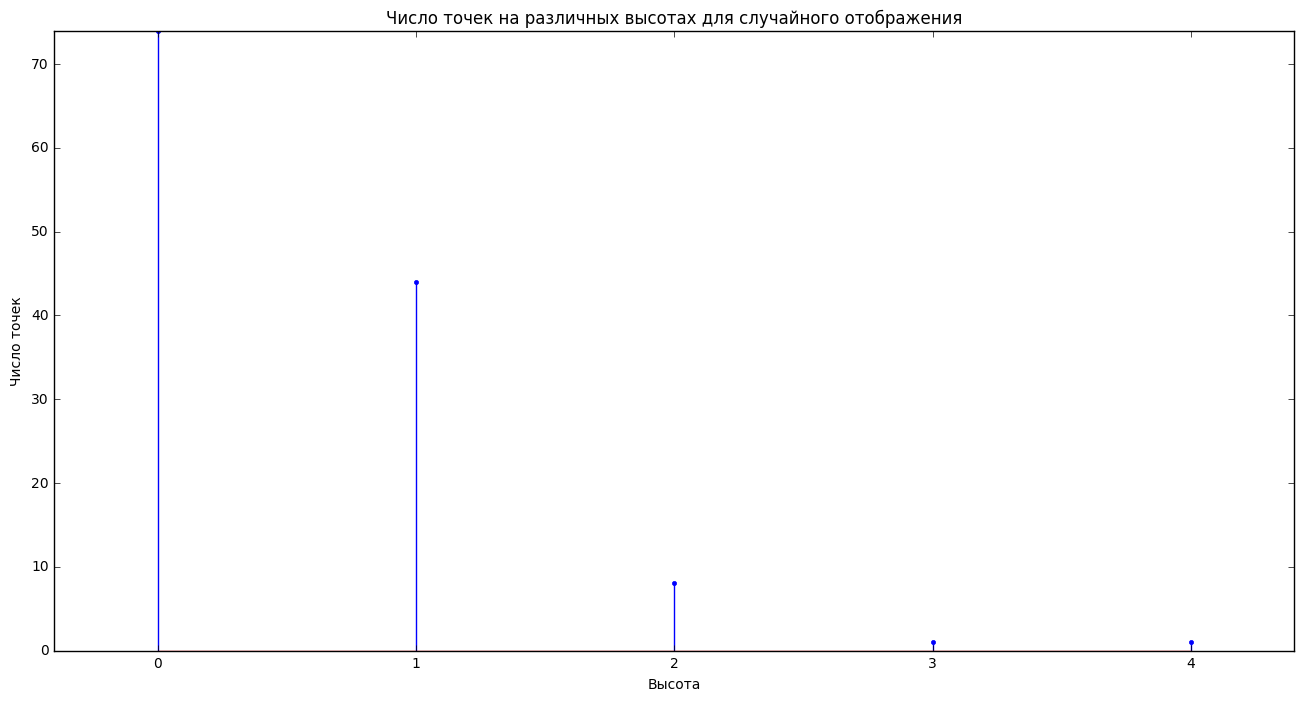


Отображение №2:
Число компонент сильной связности: 68
Число точек без прообраза: 53


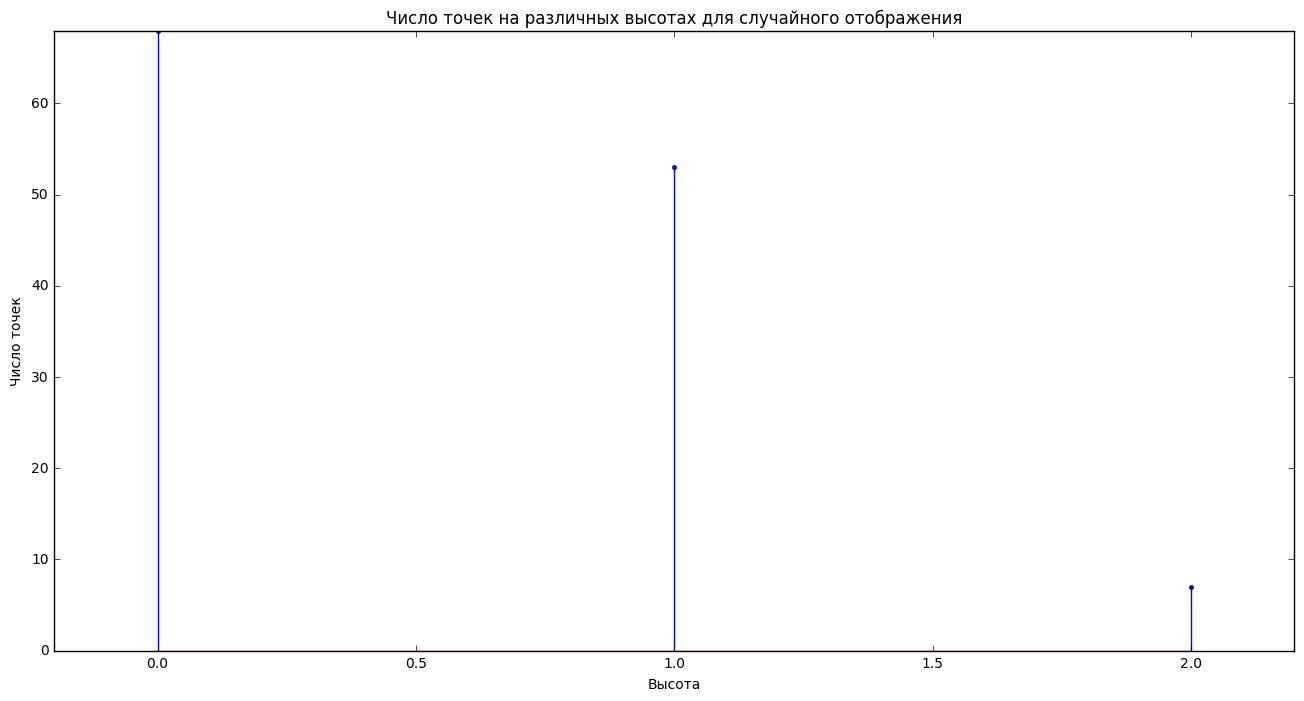


Отображение №3:
Число компонент сильной связности: 74
Число точек без прообраза: 54


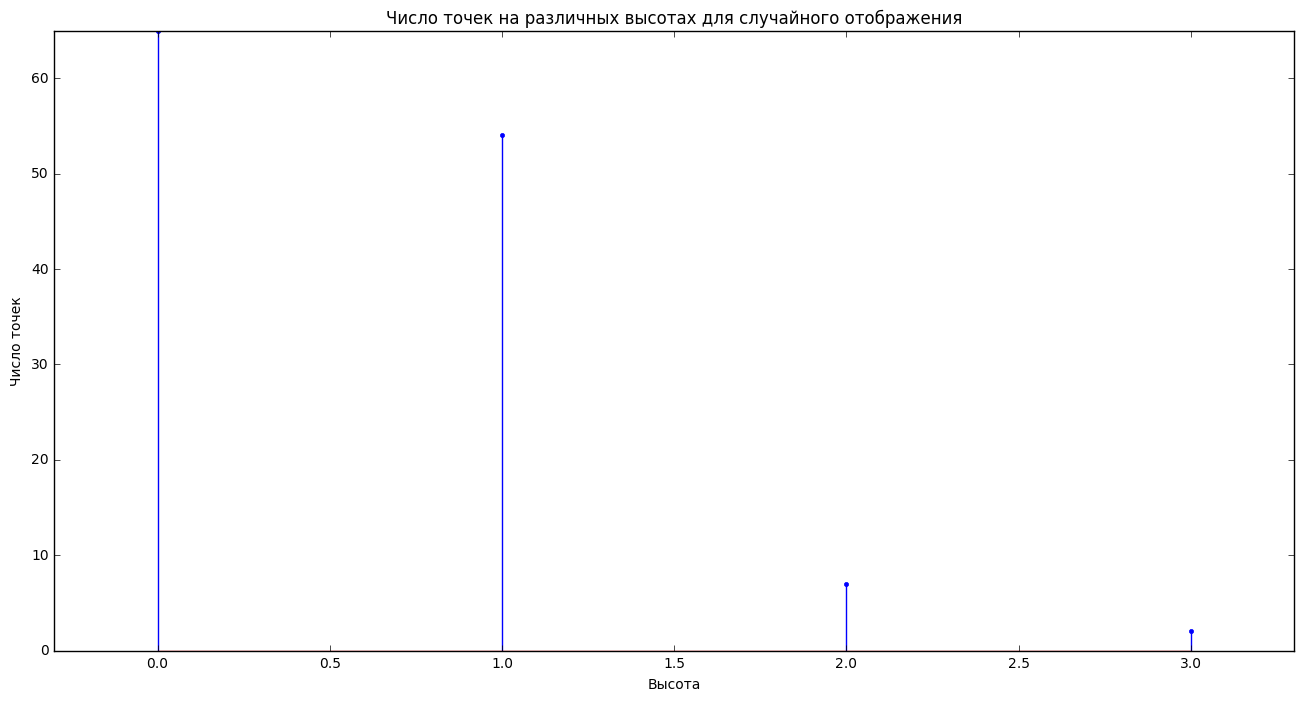


Отображение №4:
Число компонент сильной связности: 69
Число точек без прообраза: 47


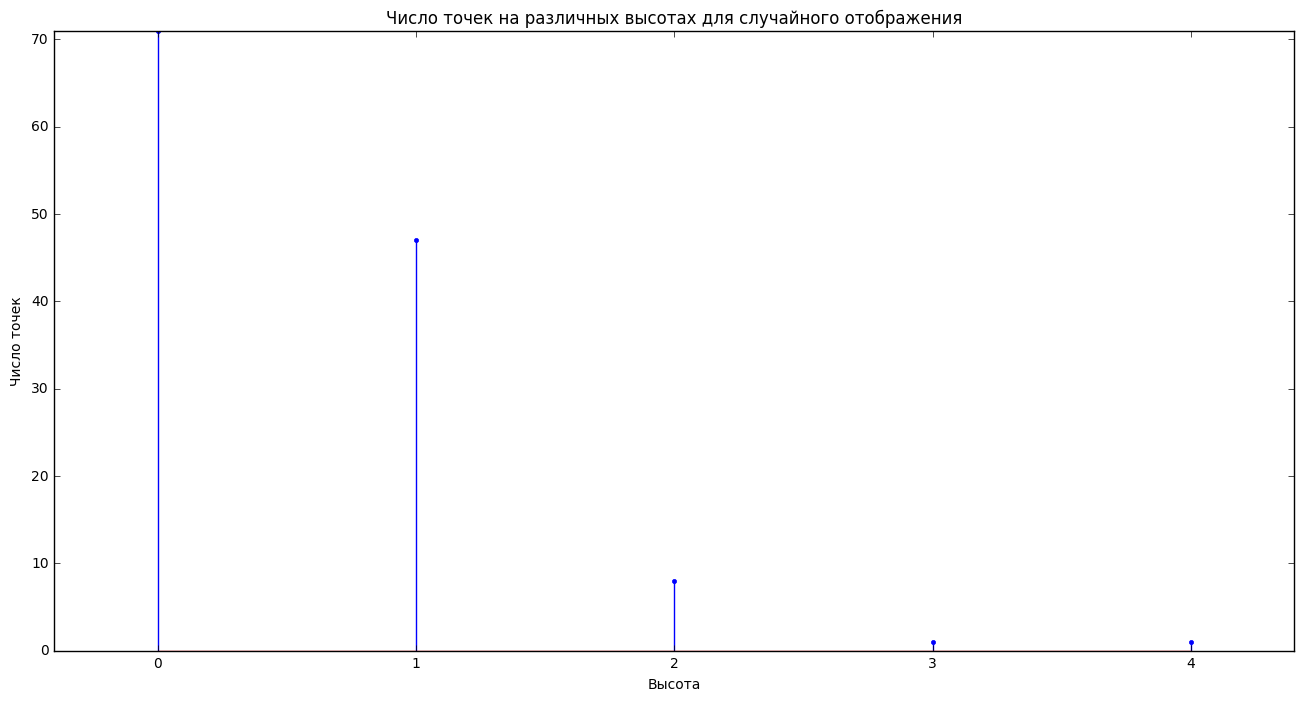


Отображение №5:
Число компонент сильной связности: 77
Число точек без прообраза: 50


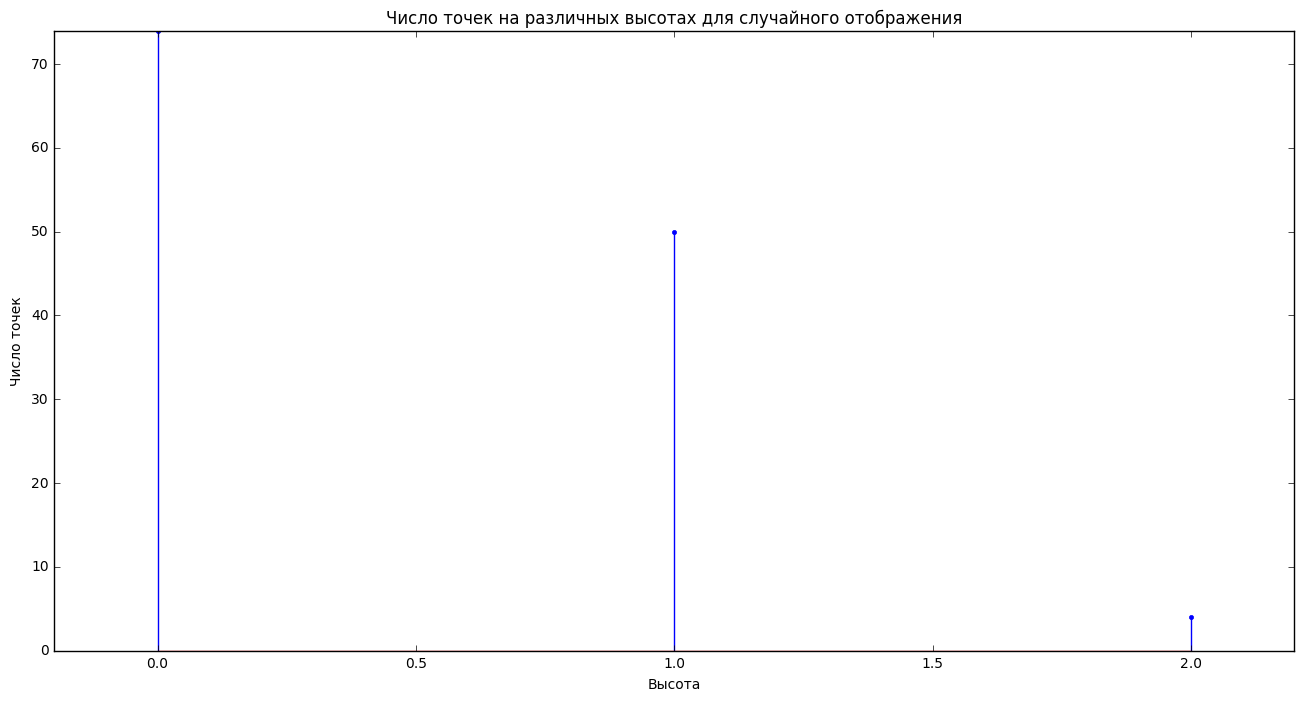


Отображение №6:
Число компонент сильной связности: 68
Число точек без прообраза: 49


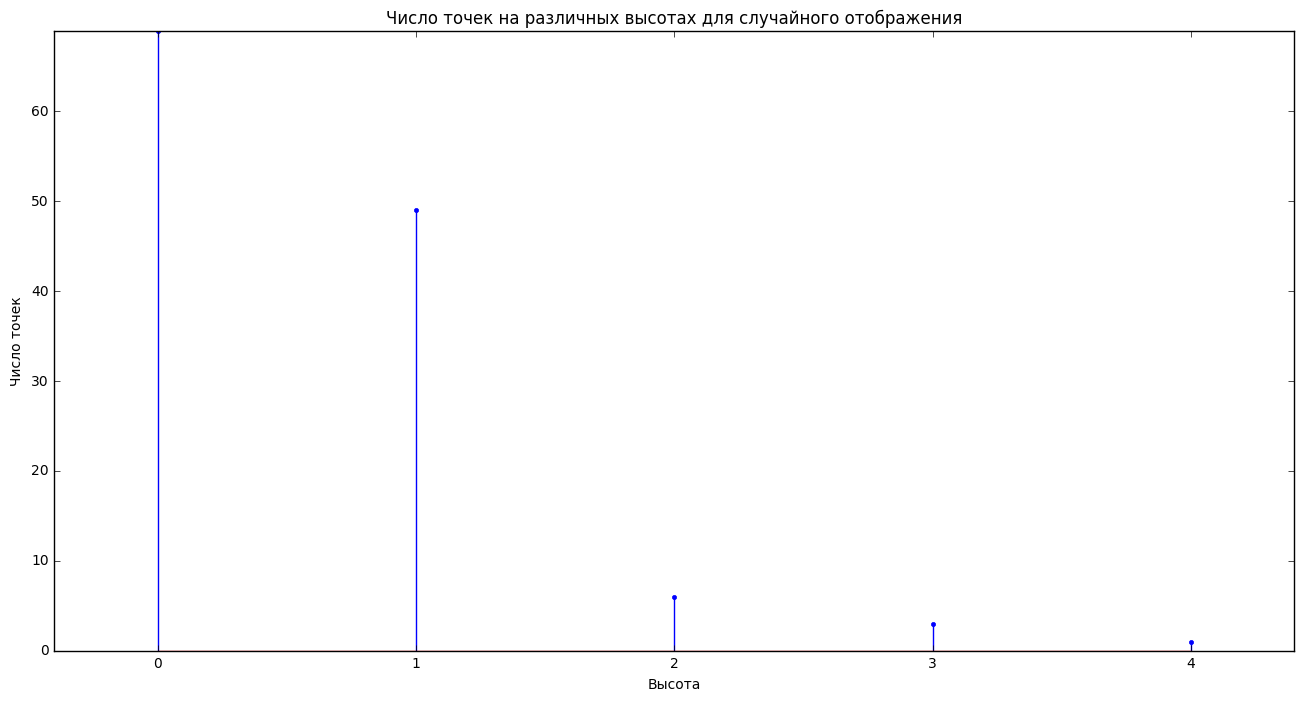


Отображение №7:
Число компонент сильной связности: 63
Число точек без прообраза: 44


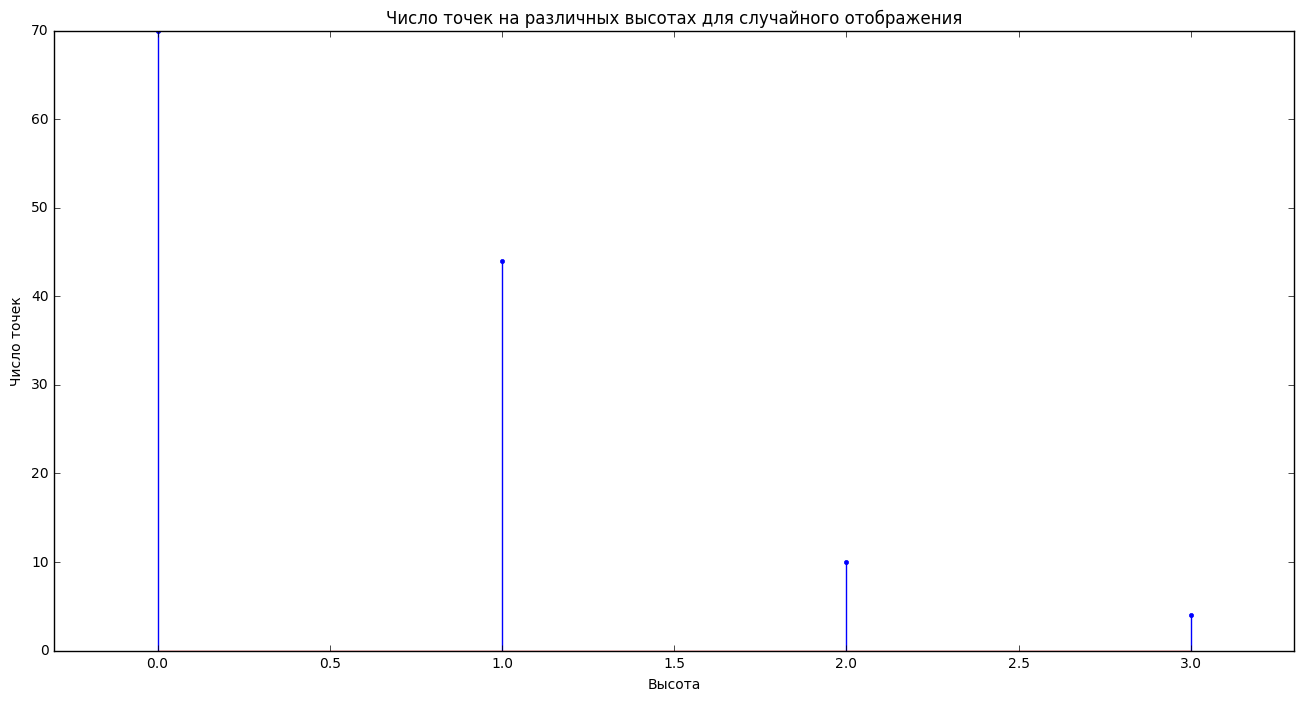


Отображение №8:
Число компонент сильной связности: 71
Число точек без прообраза: 53


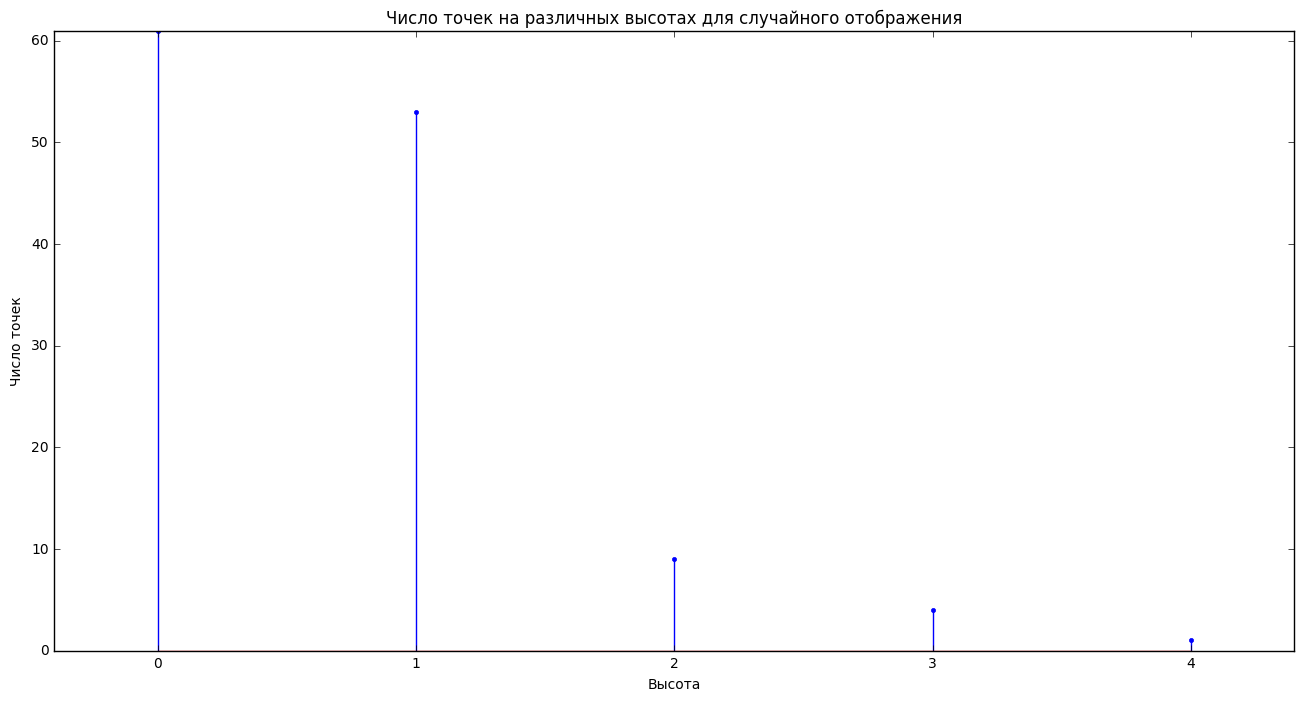


Отображение №9:
Число компонент сильной связности: 60
Число точек без прообраза: 42


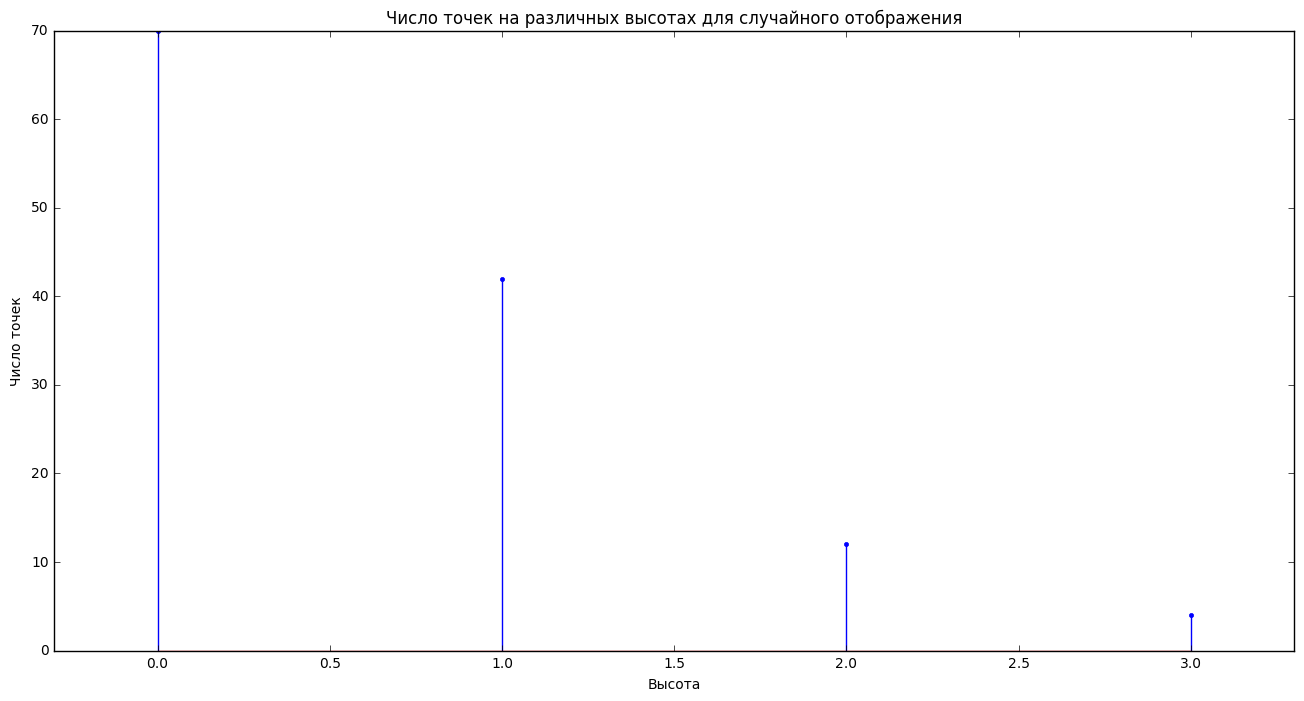


Отображение №10:
Число компонент сильной связности: 60
Число точек без прообраза: 41


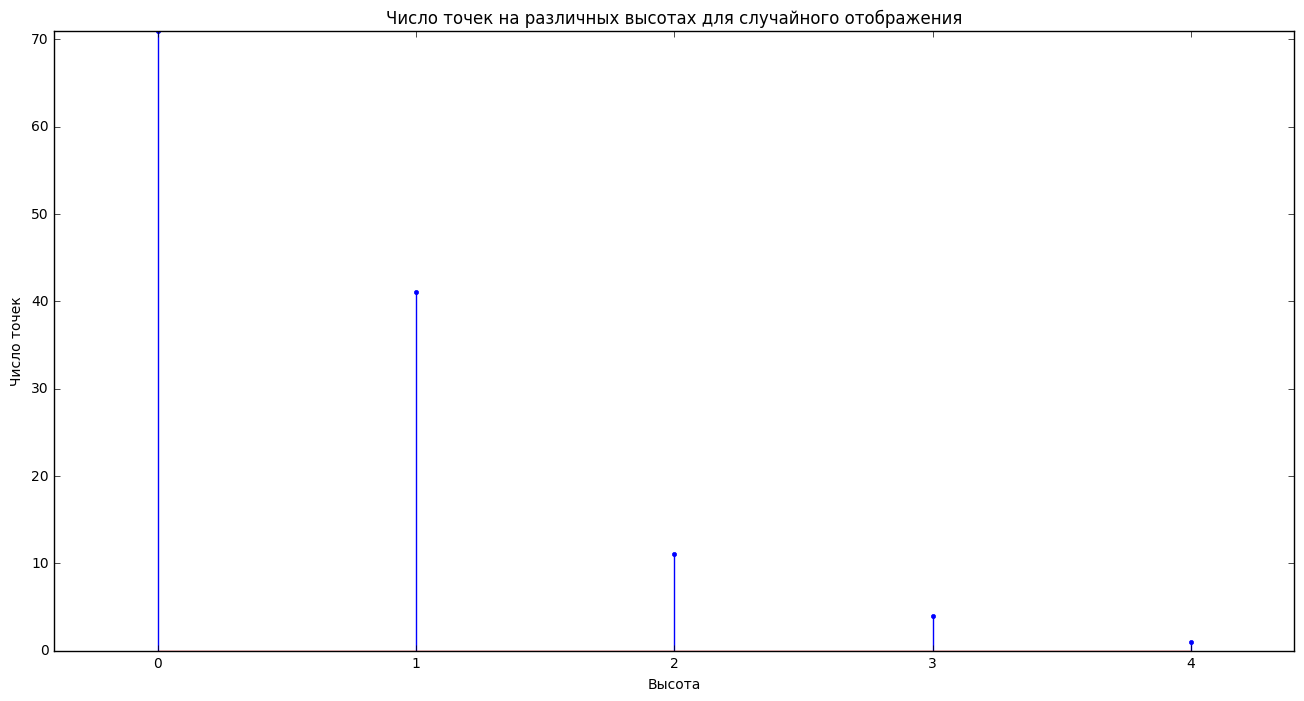

In [94]:
for i in range(10):
    print('Отображение №{}:'.format(i + 1))
    research_mapping(get_random_mapping(2**7))
    print()